In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

###sklearn.preprocessing
from statsmodels.tools.eval_measures import rmse


In [2]:
location = r"E:\Python\Machine Learning\datasets\Advertising.csv"
location

'E:\\Python\\Machine Learning\\datasets\\Advertising.csv'

In [3]:
#import numpy, pandas,
# load the training data from glass data set
df_training = pd.read_csv(location)
df_training.head()

,Month,TV,radio,newspaper,sales
0,Jan-00,230.1,37.8,69.2,22.1
1,Feb-00,44.5,39.3,45.1,10.4
2,Mar-00,17.2,45.9,69.3,9.3
3,Apr-00,151.5,41.3,58.5,18.5
4,May-00,180.8,10.8,58.4,12.9


In [ ]:
type(df_training)

In [4]:
df_training.dtypes

Month         object
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [ ]:
df_training.info()

In [ ]:
df_training.tail()

In [5]:
df_training.columns

Index(['Month', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df2= df_training.describe()

In [7]:
df2

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df_training.drop("Month", axis = 1, inplace = True)

In [ ]:
# check the shape of the DataFrame (rows, columns)
df_training.shape

In [9]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


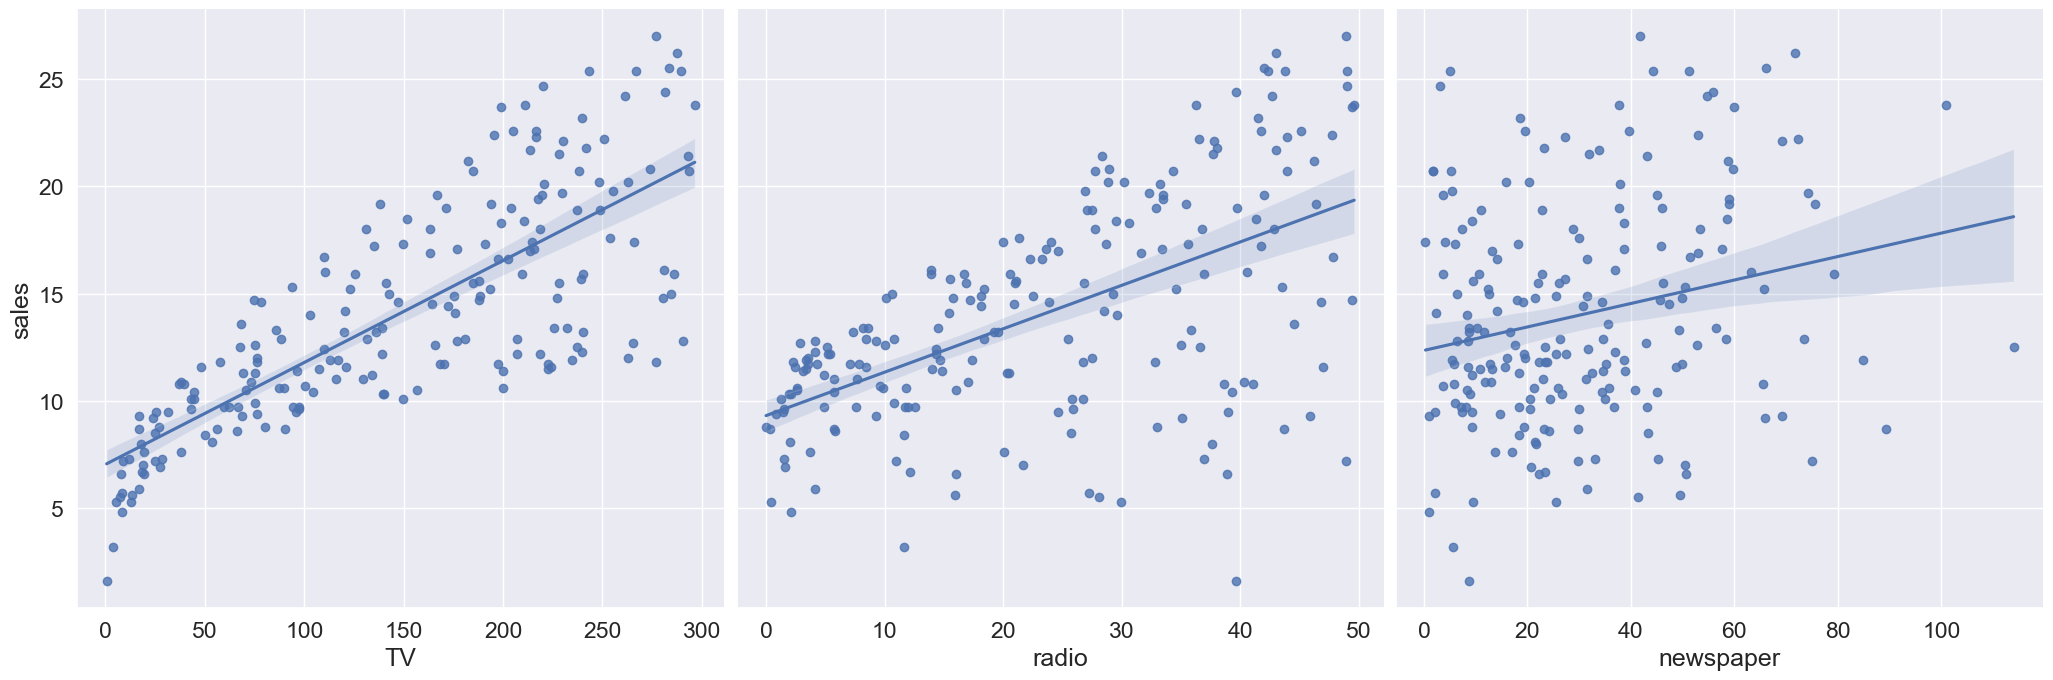

In [10]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_training,
             x_vars=['TV','radio','newspaper'], 
             y_vars='sales', 
             height=7, 
             aspect=1,
            kind ='reg')
#plt.show()

In [11]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']
#print(type(feature_cols))
# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]


# select a Series from the DataFrame
y = df_training['sales']
type(y)

pandas.core.series.Series

In [14]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [12]:
df_training.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [15]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.2)

In [ ]:
type(X_train.size)

In [ ]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

In [16]:
from sklearn.linear_model import LinearRegression
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# fit the model to the training data (learn the coefficients)
#linreg_sm = smdl.OLS(y_train, X_train).fit()

LinearRegression()

In [17]:
linreg.coef_

array([0.0468431 , 0.17854434, 0.00258619])

In [18]:
linreg.intercept_

2.907947020816433

In [19]:
linreg.predict([[140, 40, 30]])

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.6853408])

In [20]:
linreg.predict([[140, 40, 0]])

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.60775522])

#y= b0 + b1x1 + b2x2 + b3x3
#y = linreg.intercept_ + linreg.coef_[0]* df["col_name"] + linreg.coef_[1]*df['col2_name'] + linreg[2]*df["col3_name"]

## Matrix
## Metrics: errors

In [21]:
# Making predictions
# make predictions on the testing set
y_pred = linreg.predict(X_test)
# predict using sm
#y_pred_sm = linreg.predict(X_test)

In [22]:
y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
Name: sales, dtype: float64

In [23]:
y_pred

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

In [ ]:
linreg.coef_

In [ ]:
feature_cols

In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

In [ ]:
linreg.intercept_

In [ ]:
# y = 2.93 + 0.0466 * TV + 0.176 * Radio + 0.0018 * Newspaper

# 0.0466 * TV - per unit increase in TV spend will lead to 4.66% increase in sales
# 0.179 * Radio -                                          17.9% 
# 0.00345 * Newspaper - ...............                    0.3 % ....

In [24]:
# Model evaluation metrics for regression
from sklearn import metrics
print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

y-intercept             :  2.907947020816433
beta coefficients       :  [0.0468431  0.17854434 0.00258619]
Mean Abs Error   MAE    :  1.0402154012924716
Mean Sq  Error MSE      :  1.9918855518287901
Root Mean Sq Error RMSE :  1.4113417558581587
r2 value                :  0.8927605914615384
